

# Project: TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set contains information about 10,000 movies collected from The **Movie Database (TMDb)**, including user ratings and revenue.
>
>● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
>
>● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
>
>● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
>
>
#### Questions to be addressed from this data analysis are as follows
>
>1. Display the title of a movie having runtime >= 180 Minutes
>
>2. In which year was the Highest Average Voting?
>
>3. In Which year was The highest Average Revenue?
>
>4. Find the Average rating for each Director?
>
>5. Display the Top 10 Lengthy Movies Title and Runtime?
>
>6. Display the Number of movies per year?
>
>7. Find the most Popular Movie Title(Highest Revenue)?
>
>8. Display the Top Highest Rated Movies Titles And its Directors?
>
>9. Display the Top 10 Highest Revenue Movie Titles?
>
>10. Find Average Rating of Movies Year Wise ?
>
>11. Movies Based on Ratings [Excellent, Good and Average] ?
>
>12. Count the Number of Action Movies?
> 
>13. Find the Unique Values from Generes?
>
>14. Which director produces the higher number of movies?
>
>15. Does the rating affect the revenue? 
>

In [103]:
#  import all required packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

###   Load  and Read the data
> load and read the movie database. Store it in a variable called `tmdb-movies.csv`.

In [104]:
# Load the data and print out a few lines. Perform operations to inspect data

df = pd.read_csv('tmdb-movies.csv')

In [105]:
#   types and look for instances of missing or possibly errant data.
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [106]:
#Find the shape of the dataset( Number of rows and Columns)
df.shape

(10866, 21)

In [107]:
#Getting detail information about our dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning (Replace this with more specific notes!)

In [108]:
# list the nulll values from the  movie data
df.isnull().sum(axis=0).sort_values(ascending=False)

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
budget_adj                 0
release_year               0
vote_average               0
vote_count                 0
release_date               0
id                         0
runtime                    0
original_title             0
revenue                    0
budget                     0
popularity                 0
revenue_adj                0
dtype: int64

In [109]:
# column-wise null percentages here
df.isnull().sum(axis=0).sort_values(ascending=False)/len(df) * 100

homepage                72.979937
tagline                 25.989324
keywords                13.740107
production_companies     9.479109
cast                     0.699429
director                 0.404933
genres                   0.211669
imdb_id                  0.092030
overview                 0.036812
budget_adj               0.000000
release_year             0.000000
vote_average             0.000000
vote_count               0.000000
release_date             0.000000
id                       0.000000
runtime                  0.000000
original_title           0.000000
revenue                  0.000000
budget                   0.000000
popularity               0.000000
revenue_adj              0.000000
dtype: float64

In [110]:
# removing non useful collumns for data analysis which includes homepage, tagline ,imdb_id, overview, and keywords and production_companies columns 
df.drop(columns = ['homepage','tagline','keywords','production_companies','imdb_id','overview',], inplace=True) 

In [111]:
#  read the avalible columns and rows after removing the above collumns 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10790 non-null  object 
 6   director        10822 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_count      10866 non-null  int64  
 11  vote_average    10866 non-null  float64
 12  release_year    10866 non-null  int64  
 13  budget_adj      10866 non-null  float64
 14  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


In [112]:
# genres raw is essential for our data analysis and we have to remove the null value raws of genres         
df.dropna(how='any', subset=['genres'], inplace=True)

In [113]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04
mean,65868.491930,0.647456,1.465672e+07,3.990779e+07,102.137508,217.813705,5.973974,2001.315595,1.758827e+07,5.147332e+07
std,91977.394803,1.000986,3.093864e+07,1.171131e+08,31.293320,576.155351,0.934260,12.813298,3.433299e+07,1.447664e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.500000,0.208253,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20558.000000,0.384555,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75182.000000,0.715349,1.500000e+07,2.413675e+07,111.000000,146.000000,6.600000,2011.000000,2.093530e+07,3.387655e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [114]:
# From  the above collumn we can see that more than 50% of the adjusted revenue collumn data is to 0.0 
# We will drop the 0.0 value  rows of the adjusted revenue

df=df.drop(df.index[df['revenue_adj'] ==0.0])

In [115]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4850.000000,4850.000000,4.850000e+03,4.850000e+03,4850.000000,4850.000000,4850.000000,4850.000000,4.850000e+03,4.850000e+03
mean,44575.000619,1.045109,2.956970e+07,8.922066e+07,107.964742,436.215876,6.148763,2000.921649,3.516102e+07,1.150774e+08
std,72361.405911,1.356628,4.051343e+07,1.620684e+08,21.112847,806.416200,0.798795,11.569192,4.375672e+07,1.988419e+08
min,5.000000,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,8286.000000,0.387754,1.700000e+06,7.708081e+06,95.000000,46.000000,5.600000,1994.000000,2.332078e+06,1.046262e+07
50%,12154.500000,0.680289,1.500000e+07,3.182654e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.392749e+07
75%,43956.500000,1.210457,4.000000e+07,9.991823e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.315644e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<strong> we have cleaned the data and we will go further analysis  <strong>

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 Display the title of a movie having runtime >= 180 Minutes

In [116]:
# display the movie which has greather than or equal to 180 min runtime movies
df[df['runtime']>=180]['original_title']

2107                                            Carlos
2414                                    The Green Mile
2469                                          Magnolia
2642                                      Pearl Harbor
2722                                  Band of Brothers
2741                                    Dil Chahta Hai
3110                                      Jodhaa Akbar
3235                                           Ghajini
4222                                        Wyatt Earp
4949     The Lord of the Rings: The Return of the King
5065                                 Gods and Generals
5231                                           Titanic
5428                           The Wolf of Wall Street
6215                                         King Kong
7332                                     Heaven's Gate
7471                                        Grindhouse
8002                                   The Right Stuff
8134                                             Nixon
8282      

### Research Question 2  In which year was the highest average voting?

In [117]:
df.groupby('release_year')['vote_average'].mean().sort_values(ascending=False)

release_year
1964    6.987500
1960    6.985714
1969    6.920000
1966    6.880000
1972    6.880000
1973    6.805882
1976    6.787500
1963    6.771429
1974    6.735294
1970    6.669231
1971    6.657143
1975    6.653333
1967    6.642857
1961    6.620000
1962    6.611111
1968    6.566667
1978    6.545833
1965    6.540000
1979    6.488889
1982    6.452500
1981    6.365000
1977    6.362500
2014    6.318860
1985    6.291045
1987    6.276389
1980    6.241026
2015    6.220370
1984    6.194340
1993    6.175000
2013    6.159836
1991    6.155714
2007    6.153333
2011    6.152697
1999    6.152542
1992    6.143902
1995    6.129000
1989    6.125974
1997    6.124299
1998    6.121698
2010    6.113761
2002    6.106475
1990    6.102597
1986    6.082895
2006    6.080583
2004    6.077439
2005    6.073370
2009    6.061000
2001    6.049219
2008    6.041748
2003    6.041007
1994    6.017241
1996    6.014423
1988    6.012346
2012    5.993056
2000    5.969369
1983    5.944231
Name: vote_average, dtype: float64

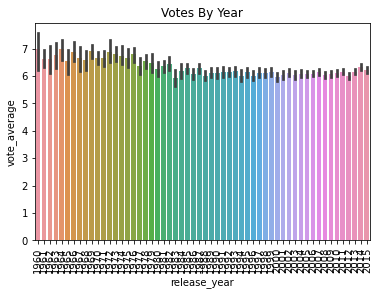

In [118]:
# visualizing the data
sns.barplot(x=df['release_year'], y=df['vote_average'])
plt.title("Votes By Year")
plt.xticks(rotation=90)
plt.show()

### Research Question 3 In which year was the highest average revenue?

In [119]:
df.groupby('release_year')['revenue'].mean().sort_values(ascending=False)

release_year
2015    1.239002e+08
2012    1.142057e+08
2009    1.109009e+08
2003    1.089082e+08
2014    1.067156e+08
2002    1.053498e+08
2001    1.047663e+08
2004    1.024014e+08
2013    1.012444e+08
2010    1.007339e+08
1997    9.958106e+07
2007    9.954702e+07
2000    9.890722e+07
2011    9.832196e+07
1999    9.623485e+07
2008    9.432862e+07
1965    9.161637e+07
1995    9.156341e+07
1977    9.085763e+07
2005    8.976541e+07
1998    8.955825e+07
1994    8.155666e+07
1996    7.991819e+07
2006    7.900844e+07
1992    7.412382e+07
1973    7.199889e+07
1990    6.902814e+07
1991    6.723714e+07
1989    6.707693e+07
1993    6.439955e+07
1975    6.383266e+07
1979    6.239981e+07
1982    6.146110e+07
1978    5.707415e+07
1967    5.270247e+07
1976    5.006285e+07
1984    4.972688e+07
1972    4.947302e+07
1969    4.879142e+07
1987    4.808479e+07
1974    4.779646e+07
1988    4.616729e+07
1980    4.535032e+07
1983    4.437556e+07
1981    4.436516e+07
1970    4.309400e+07
1985    4.292198e+07


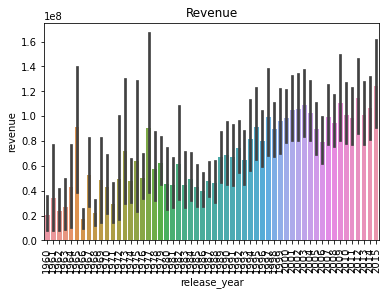

In [120]:
# visualizing the data
sns.barplot(x=df['release_year'], y=df['revenue'])
plt.title("Revenue")
plt.xticks(rotation=90)
plt.show()

### Research Question 4  Find the Average rating for each director ?

In [121]:
df.groupby('director')['vote_average'].mean().sort_values(ascending=False)

director
Damien Chazelle                                                                                                   8.2
Richard Press                                                                                                     8.1
Phil Alden Robinson|Richard Loncraine|Mikael Salomon|David Nutter|Tom Hanks|David Leland|David Frankel|Tony To    8.0
Pete Docter                                                                                                       8.0
Lauren Lazin                                                                                                      8.0
                                                                                                                 ... 
Robert Young                                                                                                      3.4
Farhad Mann                                                                                                       3.3
Vince Offer                                    

### Research Question 5  Display Top 10 lengthy movies title and runtime?

In [122]:
Top10_len = df.nlargest(10,'runtime')[['original_title', 'runtime']]\
.set_index('original_title')

In [123]:
Top10_len

,runtime
original_title,
Band of Brothers,705
Carlos,338
Gettysburg,254
Cleopatra,248
Heaven's Gate,219
Lawrence of Arabia,216
Gods and Generals,214
Jodhaa Akbar,213
Malcolm X,202


<AxesSubplot:xlabel='runtime', ylabel='original_title'>

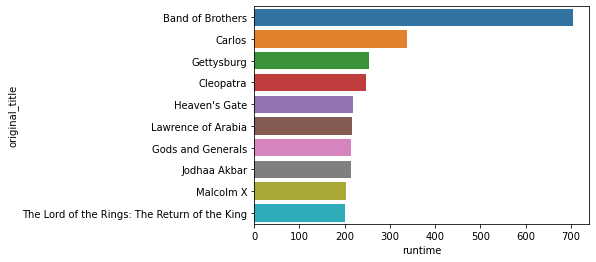

In [124]:
# visualizing the data
sns.barplot(x='runtime', y=Top10_len.index, data=Top10_len)

### Research Question 6  Display the number of movies per year ?

In [125]:
df['release_year'].value_counts()

2013    244
2011    241
2014    228
2010    218
2012    216
2015    216
2008    206
2006    206
2009    200
2007    195
2005    184
2004    164
2002    139
2003    139
2001    128
1999    118
2000    111
1993    108
1997    107
1998    106
1996    104
1995    100
1994     87
1992     82
1988     81
1990     77
1989     77
1986     76
1987     72
1991     70
1985     67
1984     53
1983     52
1981     40
1982     40
1980     39
1979     27
1978     24
1977     24
1973     17
1974     17
1976     16
1975     15
1971     14
1967     14
1970     13
1968     12
1961     10
1972     10
1962      9
1964      8
1960      7
1963      7
1965      5
1969      5
1966      5
Name: release_year, dtype: int64

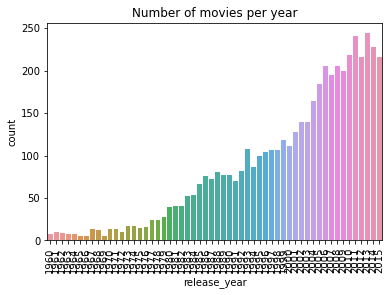

In [126]:
# visualize the data
sns.countplot(x=df['release_year'])
plt.title("Number of movies per year")
plt.xticks(rotation=90)
plt.show()

### Research Question 7  Find the most popular movie title(Highest Revenue)?

In [127]:
df[df['revenue'].max()==df['revenue']]['original_title']

1386    Avatar
Name: original_title, dtype: object

In [128]:
df['release_year'].value_counts()

2013    244
2011    241
2014    228
2010    218
2012    216
2015    216
2008    206
2006    206
2009    200
2007    195
2005    184
2004    164
2002    139
2003    139
2001    128
1999    118
2000    111
1993    108
1997    107
1998    106
1996    104
1995    100
1994     87
1992     82
1988     81
1990     77
1989     77
1986     76
1987     72
1991     70
1985     67
1984     53
1983     52
1981     40
1982     40
1980     39
1979     27
1978     24
1977     24
1973     17
1974     17
1976     16
1975     15
1971     14
1967     14
1970     13
1968     12
1961     10
1972     10
1962      9
1964      8
1960      7
1963      7
1965      5
1969      5
1966      5
Name: release_year, dtype: int64

### Research Question 8  Display the top highest rated movies titles and its directors?

In [129]:
top10_len = df.nlargest(10,'vote_average')[['original_title', 'vote_average', 'director']]\
.set_index('original_title')

In [130]:
top10_len

,vote_average,director
original_title,,
The Shawshank Redemption,8.4,Frank Darabont
Stop Making Sense,8.4,Jonathan Demme
The Godfather,8.3,Francis Ford Coppola
Whiplash,8.2,Damien Chazelle
Bill Cunningham New York,8.1,Richard Press
Fight Club,8.1,David Fincher
The Dark Knight,8.1,Christopher Nolan
Pulp Fiction,8.1,Quentin Tarantino
Forrest Gump,8.1,Robert Zemeckis


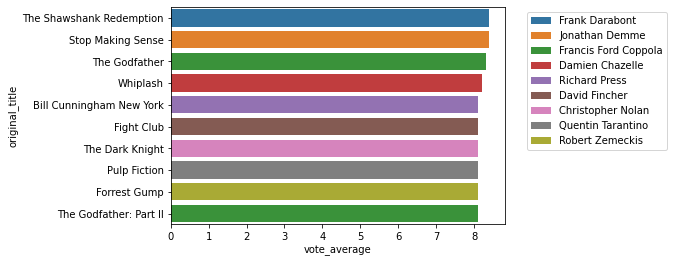

In [131]:
# visualizing the data
sns.barplot(x='vote_average', y=top10_len.index, data=top10_len, hue='director',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1), loc=2)

### Research Question 9  Display the top 10 highest revenue movie titles?

In [132]:
df.nlargest(10,'revenue_adj')['original_title']

1386                             Avatar
1329                          Star Wars
5231                            Titanic
10594                      The Exorcist
9806                               Jaws
3          Star Wars: The Force Awakens
8889         E.T. the Extra-Terrestrial
8094                            The Net
10110    One Hundred and One Dalmatians
4361                       The Avengers
Name: original_title, dtype: object

In [133]:
top10=df.nlargest(10,'revenue_adj')[['original_title', 'revenue_adj']]\
.set_index('original_title')

In [134]:
top10

,revenue_adj
original_title,
Avatar,2.827124e+09
Star Wars,2.789712e+09
Titanic,2.506406e+09
The Exorcist,2.167325e+09
Jaws,1.907006e+09
Star Wars: The Force Awakens,1.902723e+09
E.T. the Extra-Terrestrial,1.791694e+09
The Net,1.583050e+09
One Hundred and One Dalmatians,1.574815e+09


Text(0.5, 1.0, 'Top 10 Highest Revenue Movie Titles')

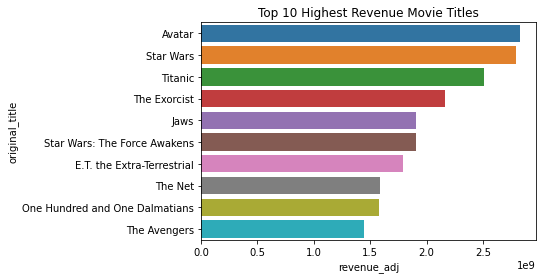

In [135]:
# visualizing the data
sns.barplot(x='revenue_adj', y=top10.index, data=top10)
plt.title("Top 10 Highest Revenue Movie Titles")

### Research Question 10  Find the average rating of movies on year wise ?

In [136]:
df.groupby('release_year')['vote_average'].mean().sort_values(ascending=False)

release_year
1964    6.987500
1960    6.985714
1969    6.920000
1966    6.880000
1972    6.880000
1973    6.805882
1976    6.787500
1963    6.771429
1974    6.735294
1970    6.669231
1971    6.657143
1975    6.653333
1967    6.642857
1961    6.620000
1962    6.611111
1968    6.566667
1978    6.545833
1965    6.540000
1979    6.488889
1982    6.452500
1981    6.365000
1977    6.362500
2014    6.318860
1985    6.291045
1987    6.276389
1980    6.241026
2015    6.220370
1984    6.194340
1993    6.175000
2013    6.159836
1991    6.155714
2007    6.153333
2011    6.152697
1999    6.152542
1992    6.143902
1995    6.129000
1989    6.125974
1997    6.124299
1998    6.121698
2010    6.113761
2002    6.106475
1990    6.102597
1986    6.082895
2006    6.080583
2004    6.077439
2005    6.073370
2009    6.061000
2001    6.049219
2008    6.041748
2003    6.041007
1994    6.017241
1996    6.014423
1988    6.012346
2012    5.993056
2000    5.969369
1983    5.944231
Name: vote_average, dtype: float64

### Research Question 11  Movies Based on Ratings [Excellent, Good and Average] 

In [137]:
def vote_average(vote_average):
    if vote_average >= 7.0:
        return "Excellent"
    elif vote_average>=6.0:
        return "Good"
    else:
        return "Average"
    

In [138]:
# creating new column to satsfiye the above condition
df['rating_cat']=df['vote_average'].apply(vote_average)

In [139]:
df.head(10)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,rating_cat
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Good
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Excellent
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Good
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Excellent
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Excellent
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,Excellent
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,Average
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,Excellent
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,Good
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,Excellent


### Research Question 12  Count the number of action movies? 

In [140]:
#cheking data taype  
df['genres'].dtype

dtype('O')

In [141]:
# since its str data type we apply str methods
len(df[df['genres'].str.contains('Action', case=False)]) # to make it case insensetive 

1261

<Strong>There are 1261 Action movies in our datasat <strong>

### Research Question 13  Find the unique values from generes?

In [142]:
df.genres.str.split('|',expand=True).stack().value_counts()

Drama              2275
Comedy             1771
Thriller           1424
Action             1261
Romance             877
Adventure           843
Crime               774
Science Fiction     587
Horror              561
Family              513
Fantasy             461
Mystery             410
Animation           237
Music               186
History             153
War                 137
Documentary         102
Western              65
Foreign              31
TV Movie              1
dtype: int64

### Research Question 14  Which director produces the higher number of movies? (Top 20)

In [143]:
df['director'].value_counts().head(n=20)

Steven Spielberg        27
Clint Eastwood          26
Woody Allen             22
Ridley Scott            22
Ron Howard              18
Martin Scorsese         18
Steven Soderbergh       17
Tim Burton              16
Tony Scott              16
Joel Schumacher         16
Robert Zemeckis         15
Brian De Palma          15
Wes Craven              15
Rob Reiner              15
Oliver Stone            15
Renny Harlin            15
Walter Hill             14
Richard Donner          14
Barry Levinson          14
Francis Ford Coppola    13
Name: director, dtype: int64

### Research Question 15  Does the movie rating affect the revenue?   

Text(0.5, 1.0, 'Movie rating and revenue relatonship')

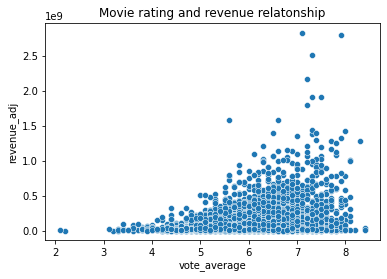

In [146]:
# visualizing the data
sns.scatterplot(x='vote_average', y='revenue_adj', data=df)
plt.title("Movie rating and revenue relatonship")

### Research Question 16  Does the budget affect the revenue?   

Text(0.5, 1.0, 'Budget and revenue relationship')

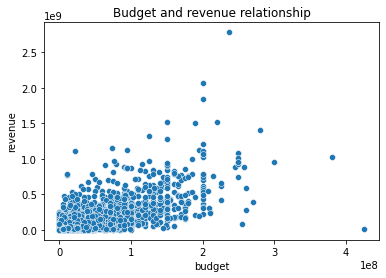

In [147]:
# visualizing the data
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title("Budget and revenue relationship")

<a id='conclusions'></a>
## Conclusions

<strong> 1. Movie rating affects  the revenue of a movie. As rating incresese revenue increses. they have postive relationship<strong>
    
<strong>2. Budget has a direct relationship with revenue. As the budget increases the revenue is also increased <strong>
    
<strong>3. Drama type of genres has the highest number of movies from all the movies dataset. Comedy  and Thriller will follow after drama. <strong>

## References 

<ol>
<li><a href="https://udacity.com">udacity.com</a></li>
<li><a href="https://stackoverflow.com/">stackoverflow</a></li>
<li><a href="https://www.askpython.com/">askpython</a></li>
<li><a href="https://www.datasciencemadesimple.com/">datasciencemadesimple</a></li>
<li><a href="https://pythonexamples.org/pandas-dataframe-delete-column/">pythonexamples</a></li>
<li><a href="https://pythonguides.com/python-pandas-drop-duplicates/">pythonguides</a></li>
<li><a href="https://www.youtube.com/">youtube</a></li>    
</ul>
